<a href="https://colab.research.google.com/github/yushiwal/GRIP_Task_1/blob/master/GRIP_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP- The Sparks Foundation** **Data Science and Business Analytics Internship**
### **Author: Aayushi Agrawal**

**Linear Regression with Python Scikit learn - Prediction using Supervised ML**


**Task 1 - Predict the percentage of an student based on the no. of study hours.**

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
print('Libraries imported successfully')

Libraries imported successfully


In [21]:
#Dataset path
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Dataset is imported successfully")
data.head(15)

Dataset is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Data discovery and visualization to gain insights**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


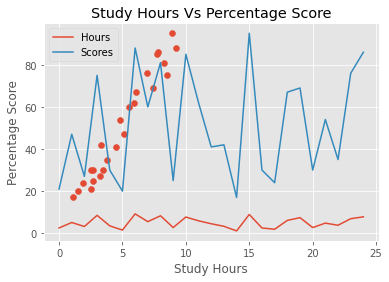

In [24]:
#visualizing with line plot
plt.style.use('ggplot')
data.plot(kind='line')
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.title("Study Hours Vs Percentage Score")
plt.show()

***From the above graph we can conclude that there is a positive linear relation between the Study Hours and Student Scores.***

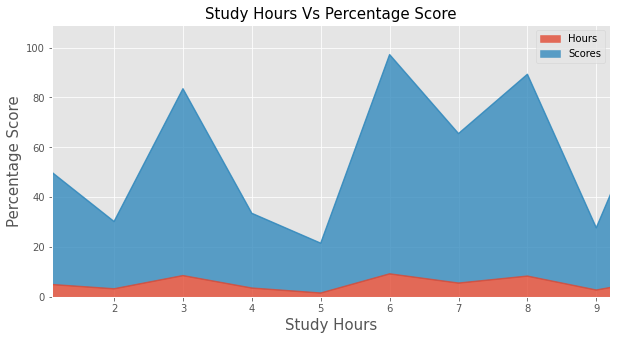

In [27]:
#visulizing with area plot

xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Study Hours Vs Percentage Score',size=15)
plt.xlabel('Study Hours',size=15)
plt.ylabel('Percentage Score',size=15)
plt.show()

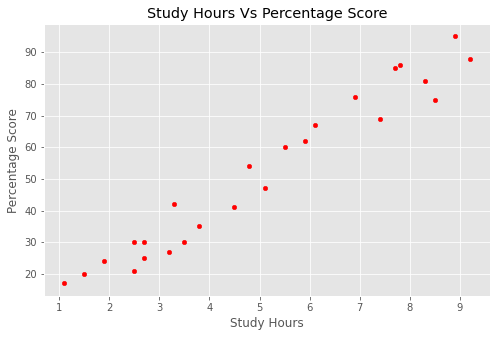

In [28]:
# visualizing with scatter plot

data.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.title('Study Hours Vs Percentage Score')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

## **Data Modelling**

In [29]:
  x=np.asanyarray(data[['Hours']])
  y=np.asanyarray(data['Scores'])

  train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

  regressor = LinearRegression()
  regressor.fit(train_x,train_y)

  print('Training is completed\n')
  print('Coefficients: ',regressor.coef_)
  print('Intercept: ',regressor.intercept_)


Training is completed

Coefficients:  [9.94061514]
Intercept:  1.5079104828268939


### **Evaluation of the model**

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score: %2f" % r2_score(y_pred, test_y))

Mean Absolute Error: 4.877039354964476
R2-score: 0.975324


In [33]:
#comparing actual vs predicted
data2 = pd.DataFrame({'Actual': test_y,'Predicted': y_pred})
data2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


### **Predicting the Score with single  input value**

In [36]:
hours=9.2
predicted_score=regressor.predict([[hours]])

print(f'Number of hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

Number of hours = 9.2
predicted Score = 92.96156979970104
